### Author: Sai Jeevan Puchakayala
Data Science & Business Analytics Internship

### Task #1:
## Prediction using Supervised ML
#### Predict the percentage of an student based on the no. of study hours / day.

### Linear Regression

The term regression is used when you try to find the relationship between variables.

In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

Linear regression is a supervised learning algorithm because it uses true labels for training. 
Supervised learning algorithm should have input variable (x) and an output variable (Y) for each example.

Linear regression uses the relationship between the data-points to draw a straight line through all them.

This line can be used to predict future values.



### 1. Importing the required libraries.

In [1]:
import pandas as pd #Pandas allows you to do various data manipulations.
import numpy as np  #Numpy allows you to perform various number of mathematical operations.
import matplotlib.pyplot as plt #Matplotlib allows you to create graphical user interfaces to visualize data. 
%matplotlib inline

### 2. Importing Data from the Dataset.

In [2]:
url = "http://bit.ly/w-data" #Dataset is provided in this link as a csv file.
data = pd.read_csv(url) #Reading CSV file from the above link.
print("Data imported successfully")
data.info()
data.head(10)#df.head() allows you to print 10 rows in your dataset.

Data imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3. Let's visualize the dataset graphically by ploting our data points on 2-D graph.

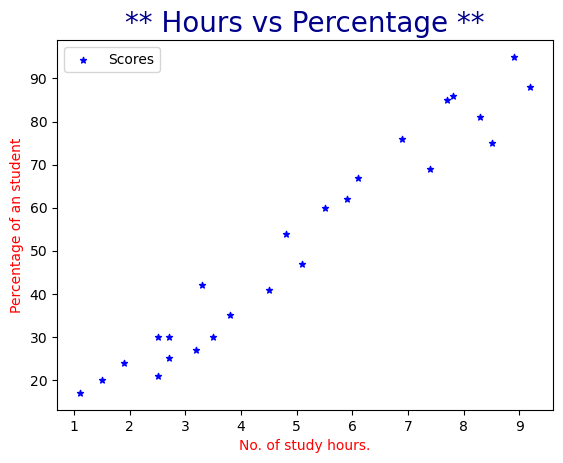

In [12]:
data.plot.scatter(x='Hours', y='Scores',label='Scores', marker='*',color='blue')
plt.style.use('default')
plt.title('** Hours vs Percentage **',fontsize=20,color='darkblue')  
plt.xlabel('No. of study hours.',color='red')  
plt.ylabel('Percentage of an student',color='red')  
plt.show()

### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### 4. Preparing the data

The next step is to divide the data into "X" (inputs) and "y" (outputs).

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

##### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

### 5. Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [6]:
from sklearn.linear_model import LinearRegression  
lin_regressor = LinearRegression()  
lin_regressor.fit(X_train, y_train) 

print("Training the algorithm is complete.")

Training the algorithm is complete.


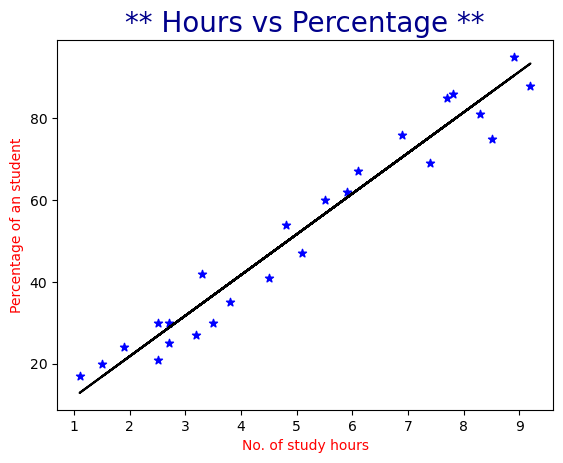

In [7]:
# Plotting the regression line
line = lin_regressor.coef_*X + lin_regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, marker='*',color='blue')
plt.style.use('default')
plt.title('** Hours vs Percentage **',fontsize=20,color='darkblue')  
plt.xlabel('No. of study hours',color='red')  
plt.ylabel('Percentage of an student',color='red')  
plt.plot(X, line,color="black")
plt.show()

### 6. Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [8]:
print(X_test) # Testing data - In Hours
y_pred = lin_regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Comparing the accurracy  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [10]:
# You can also test with your own data
hours = 9.25
own_pred = lin_regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


### 7.Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486
